# Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

filename = "jet.bmp"
url      = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/"
if not os.path.exists(filename):
	r = requests.get(url + filename, allow_redirects=True)
	open(filename, 'wb').write(r.content)

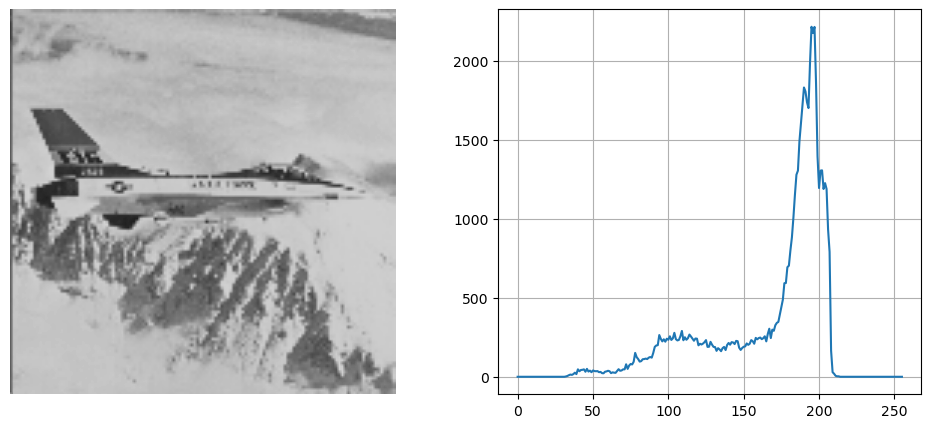

In [2]:
image     = cv2.imread(filename, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].imshow(image, "gray", vmin=0, vmax=256)
axs[0].axis("off")
axs[1].plot(histogram)
axs[1].grid()
plt.show()

In [3]:
def he_eeeeeee(threshold):
  histograms             = [ np.where(histogram <= threshold)[0], np.where(histogram > threshold)[0] ]
  histograms_cumsum      = [ histograms[0].cumsum(), histograms[1].cumsum() ]
  histograms_cumsum_norm = [
    histograms_cumsum[0] / histograms_cumsum[0].max(),
    histograms_cumsum[1] / histograms_cumsum[1].max()
  ]

  histograms_cumsum_scaled = [
    threshold * histograms_cumsum_norm[0],
    threshold + 1 + (255 - threshold - 1) * histograms_cumsum_norm[1]
  ]
  histogram_cumsum_scaled = np.concatenate(histograms_cumsum_scaled)

  image_lut = cv2.LUT(image, histogram_cumsum_scaled)
  fig, axs = plt.subplots(1, 3)
  for ax in axs:
    ax.axis("off")
  fig.set_size_inches(18, 6)
  axs[0].imshow(image, "gray", vmin=0, vmax=256)
  axs[1].imshow(image_lut, "gray", vmin=0, vmax=256)
  axs[2].imshow(cv2.LUT(image, histogram.cumsum() / histogram.cumsum().max() * 255), "gray", vmin=0, vmax=256)
  plt.show()

### Bi-Histogram Equalization (BBHE)

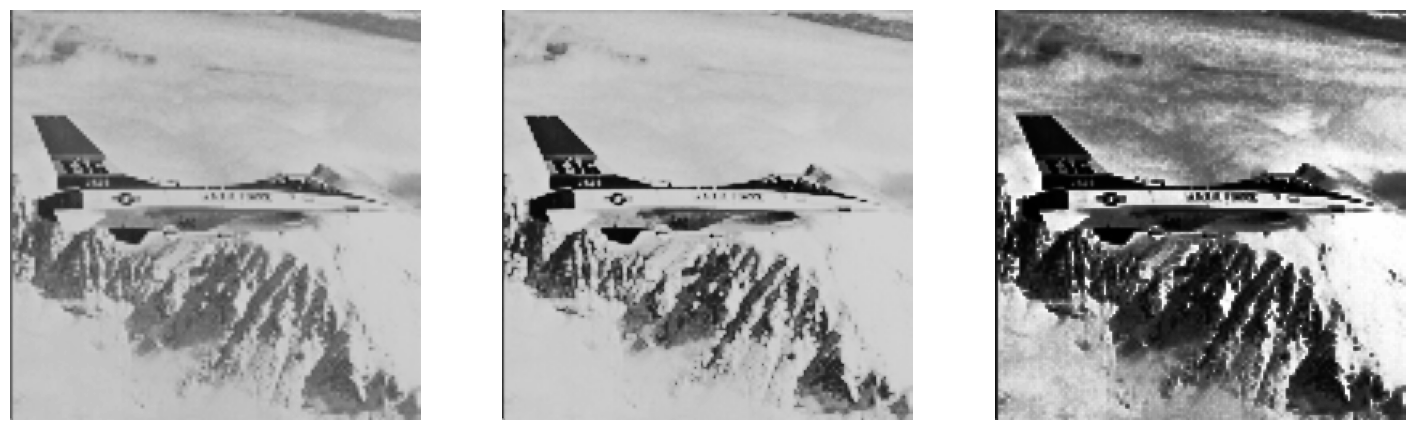

In [4]:
he_eeeeeee(image.mean())

### Dualistic Sub-Image Histogram Equalization (DSIHE)

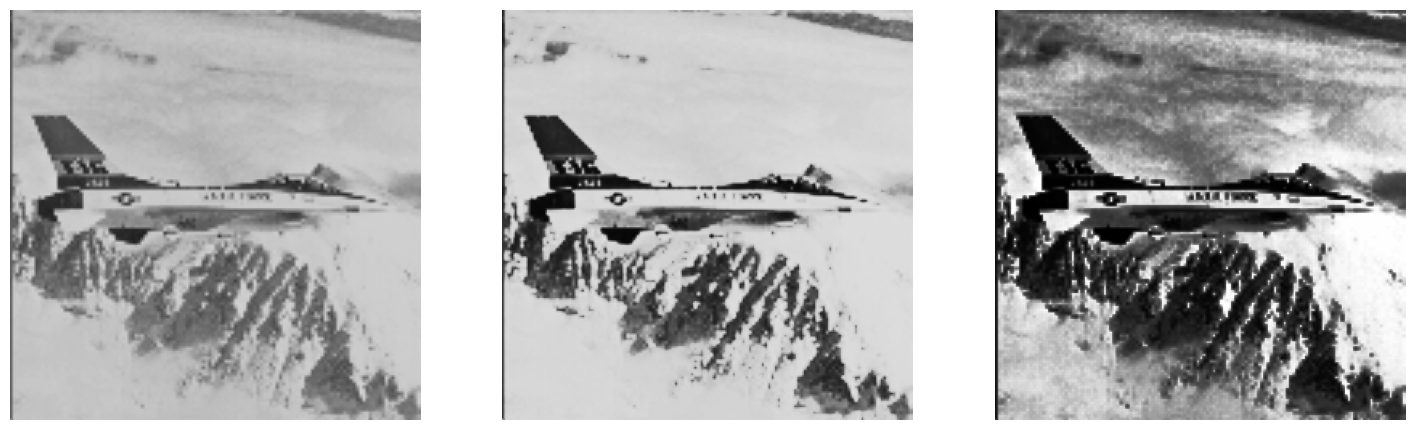

In [5]:
image_size = image.shape[0] * image.shape[1]
he_eeeeeee(np.argmin(np.abs(histogram - image_size / 2)))